# ga for knapsack

experiment with:

- population size
- generations count
- prob. crossover
- prob. mutation
- elite string (`HallOfFame`)
- selection
    - `selRoulette`
    - `selTournament`
    - `selRandom`
    - rank roulette, modify `selRoulette` input different fitness
- fitness variant
    - with correction
    - with penalization
- crossover operator
    - `cxOnePoint`
    - `cxTwoPoint`
    - `cxUniform`

In [1]:
import random
from matplotlib import pyplot
from deap import base, creator, tools
from genetic_algorithm import ga
from genetic_algorithm.tools import read_instances, read_solutions

In [2]:
filename = 'data/knap_32.dat'
solution_filename = 'data/knap_32.sol.dat'

with open(filename) as f:
    instances = read_instances(f)
with open(solution_filename) as f:
    solutions = read_solutions(f)
len(instances), len(solutions)

(500, 500)

In [3]:
instance_index = 1
instance = instances[instance_index]
weights = instance['weights']
values = instance['values']
m = instance['m']
n = instance['n']
print('weights', weights)
print('values', values)
print('m', m)

solution = solutions[instance_index]
print('solution', solution['solution'])
print('solution_value', solution['solution_value'])
print('n', solution['n'])

weights [32, 59, 24, 51, 17, 58, 40, 28, 28, 46, 17, 72, 16, 75, 93, 81, 61, 82, 86, 34, 19, 93, 72, 96, 34, 48, 49, 29, 54, 81, 94, 72]
values [460, 194, 353, 243, 381, 164, 56, 149, 494, 364, 391, 361, 5, 346, 82, 87, 75, 178, 218, 450, 311, 431, 303, 111, 341, 105, 46, 317, 174, 317, 106, 77]
m 1356
solution [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0]
solution_value 7299
n 32


## individual and fitness

this will be same for all approaches

In [4]:
# fitness value is maximalized
creator.create('Fitness', base.Fitness, weights=(1,))
creator.create('Individual', list, fitness=creator.Fitness)

In [5]:
toolbox = base.Toolbox()
toolbox.register('attr_item', random.randint, 0, 1)
toolbox.register('individual', tools.initRepeat, creator.Individual, toolbox.attr_item, n)
toolbox.register('population', tools.initRepeat, list, toolbox.individual)
toolbox.register('mate', tools.cxOnePoint)
toolbox.register('mutate', tools.mutFlipBit, indpb=0.05)
toolbox.register('select', tools.selRoulette)

In [6]:
def plot_ga_progress(logbook):
    gs = logbook.select('gen')
    mins = logbook.select('min')
    avgs = logbook.select('avg')
    maxs = logbook.select('max')

    pyplot.scatter(gs, maxs, label='max')
    pyplot.scatter(gs, avgs, label='avg')
    pyplot.scatter(gs, mins, label='min')
    pyplot.xlabel('generation')
    pyplot.ylabel('fitness')
    pyplot.legend()

## penalization

gen	min 	avg    	max 
1  	2295	3966.49	5884
2  	2820	4224.77	6118
3  	2783	4302.35	6118
4  	-1394	4178.64	6118
5  	2288 	4290.66	6118
6  	-1368	4330.22	6118
7  	2335 	4623.15	6118
8  	3057 	4699.51	6317
9  	-1365	4749.69	6317
10 	3551 	5015.33	6317
11 	-1360	5031.71	6317
12 	3892 	5171.31	6485
13 	-1361	5049.65	6485
14 	3963 	5267.3 	6580
15 	-1442	5181.25	6580
16 	3548 	5381.65	6580
17 	3960 	5525.84	6599
18 	3761 	5605.54	6916
19 	-1403	5767.32	6937
20 	4049 	5934.09	6937
21 	-1422	5650.4 	6937
22 	5170 	5975.88	6937
23 	4480 	6034.13	6937
24 	4349 	6086.11	6937
25 	-1380	6038.79	6937
26 	4822 	6204.57	6937
27 	-1409	6063.08	6937
28 	-1393	6207.22	6937
29 	4891 	6302.88	6937
30 	4691 	6333.04	6937
31 	-1412	6278   	6937
32 	5137 	6325.85	6937
33 	5137 	6288.2 	6937
34 	5137 	6354.67	6937
35 	5635 	6392.87	6937
36 	5036 	6412.46	6937
37 	-1386	6343.38	6937
38 	5098 	6363.05	7031
39 	4741 	6329.17	7031
40 	-1402	6267.82	7031
41 	-1375	6345.12	7031
42 	-1391	6263.88	7031
43 	5570 	6531.

(7299, (7267.0,))

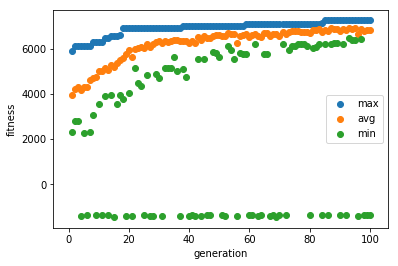

In [7]:
toolbox.register('evaluate', ga.evaluate_penalization, weights=weights, values=values, m=m)

N_POP = 100
N_GEN = 100
CXPB = 0.6
MUTPB = 0.01

population = toolbox.population(n=N_POP)
population, logbook, halloffame = ga.genetic_algorithm(
    population, toolbox, ngen=N_GEN, cxpb=CXPB, mutpb=MUTPB, elitism=1
)

plot_ga_progress(logbook)

best = halloffame.items[0]
solution['solution_value'], halloffame[0].fitness.values

## correct indivuduals

gen	min 	avg    	max 
1  	2352	3960.29	5864
2  	2203	4071.34	5864
3  	2020	4143.66	5864
4  	2203	4208.92	5986
5  	2288	4398.04	6105
6  	2611	4527.99	6105
7  	2444	4626.83	6105
8  	2403	4642.83	6195
9  	2471	4791.32	6195
10 	2387	4897.17	6195
11 	2387	4986.65	6251
12 	2980	5032.82	6251
13 	3070	5208.75	6251
14 	3147	5274.09	6251
15 	3648	5313.8 	6320
16 	3648	5398.55	6440
17 	3648	5588.53	6832
18 	4412	5595.81	6832
19 	4774	5635.09	6832
20 	4774	5665.4 	6832
21 	4486	5627.45	6832
22 	4486	5710.35	6832
23 	4655	5787.11	6832
24 	4320	5905.44	6832
25 	4126	5884.04	6885
26 	4126	5835.26	6890
27 	4171	5835.51	6890
28 	4171	5828.19	6890
29 	4685	5881.48	6940
30 	4481	5897.88	6940
31 	4481	5970   	6940
32 	4447	6081.83	6940
33 	4313	6050.42	6940
34 	4313	6151.88	6962
35 	4025	6142.95	7171
36 	4025	6129.7 	7171
37 	3834	6175.53	7171
38 	4045	6229.9 	7189
39 	4045	6346.53	7189
40 	4273	6370.37	7189
41 	5218	6383.56	7189
42 	5324	6395.87	7189
43 	5277	6476.24	7189
44 	5734	6462.89	7189
45 	5736	6

(7299, (7263.0,))

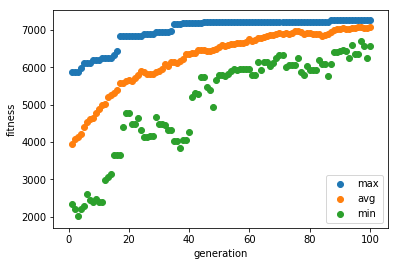

In [8]:
toolbox.register('evaluate', ga.evaluate_correction, weights=weights, values=values, m=m)

N_POP = 100
N_GEN = 100
CXPB = 0.6
MUTPB = 0.01

population = toolbox.population(n=N_POP)
population, logbook, halloffame = ga.genetic_algorithm(
    population, toolbox, ngen=N_GEN, cxpb=CXPB, mutpb=MUTPB, elitism=1
)

plot_ga_progress(logbook)

best = halloffame.items[0]
solution['solution_value'], halloffame[0].fitness.values